In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import h5py

In [3]:
def crop_image(im, new_width, new_height):
    width, height = im.size   # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    return im

def crop_arr(arr, new_width, new_height):
    width, height = arr.shape[1], arr.shape[0]   # Get dimensions

    left = int((width - new_width)/2)
    top = int((height - new_height)/2)
    right = int((width + new_width)/2)
    bottom = int((height + new_height)/2)

    # Crop the center of the array
    cropped = arr[top:bottom, left:right, :]
    return cropped

def save_image(im, path):
    """
        Saves a numpy matrix or PIL image as an image
    Args:
        im_as_arr (Numpy array): Matrix of shape DxWxH
        path (str): Path to the image
    """
    if isinstance(im, (np.ndarray, np.generic)):
        # im = format_np_output(im)
        im = Image.fromarray(im)
    im.save(path)

def crop_around(im, y, x, d=10):
    r = int(d/2)
    crop = im[y-r:y+r, x-r:x+r, :]
    return crop

def paint_around(im, y, x, d=10):
    r = int(d/2)
    painted = im.copy()
    painted[y-r:y+r, x-r:x+r, :] = im[y, x, :]
    return painted

def black_around_painted(im, y, x, inner=10, outer=200):
    inner = int(inner/2)
    outer = int(outer/2)
    painted = im.copy()
    painted[y-outer:y+outer, x-outer:x+outer, :] = np.array([0, 0, 0])
    painted[y, x, :] = im[y, x, :]
    painted[y-inner:y+inner, x-inner:x+inner, :] = im[y, x, :]
    return painted

def black_around(im, y, x, inner=10, outer=200):
    inner = int(inner/2)
    outer = int(outer/2)
    painted = im.copy()
    painted[y-outer:y+outer, x-outer:x+outer, :] = np.array([0, 0, 0])
    painted[y-inner:y+inner, x-inner:x+inner, :] = im[y-inner:y+inner, x-inner:x+inner, :]
    return painted

In [171]:
import pickle
method = 'mst_plus_plus' # 'mst_plus_plus'#'hscnn_plus'
test = 'painted' #'blackPainted' #'black'#'painted'
with open(f'./test_develop_code/big_arr_{method}_{test}', "rb") as fp:
    big_arr = pickle.load(fp)

In [172]:
all_sizes = np.zeros((10, 32))
idx2 = 0
counter = np.arange(0, 10)
counter = np.repeat(counter[None,:], 32, axis=0).flatten()
for i, v in enumerate(big_arr):
    error = v[0].numpy()
    idx1 = counter[i]
    # if np.isnan(error): continue
    all_sizes[idx1, idx2] = error
    if idx1 == 9: idx2 += 1
plot_list = []
for i in range(10):
    plot_list.append(all_sizes[i, :])

In [146]:
all_sizes = np.zeros((10, 32))
idx2 = 0
for i, v in enumerate(big_arr):
    error = v[0].numpy()
    idx1 = int(v[1][1] / 10)
    # if np.isnan(error): continue
    all_sizes[idx1, idx2] = error
    if idx1 == 9: idx2 += 1
plot_list = []
for i in range(10):
    plot_list.append(all_sizes[i, :])


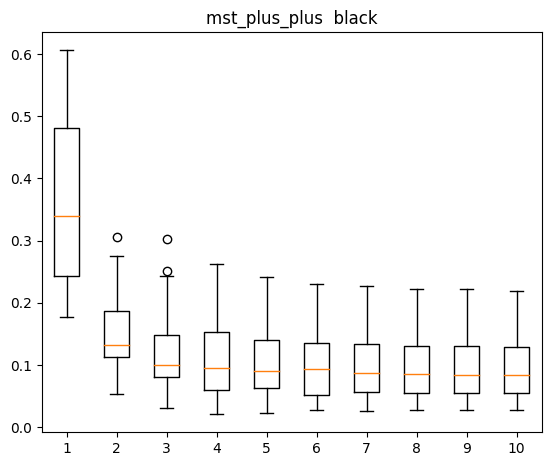

In [170]:
fig = plt.figure(figsize =(5, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(plot_list[:])
plt.title(method + '  ' + test)
plt.show()

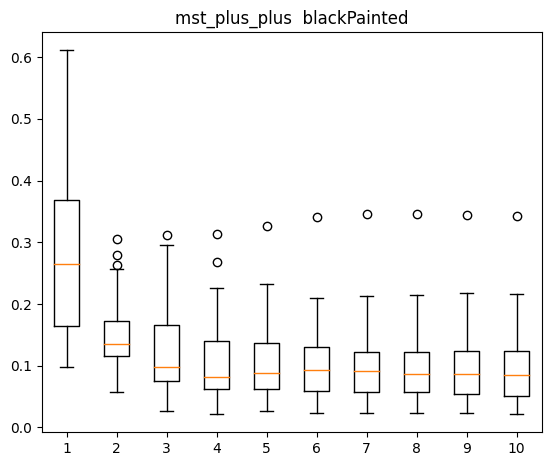

In [167]:
fig = plt.figure(figsize =(5, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(plot_list[:])
plt.title(method + '  ' + test)
plt.show()

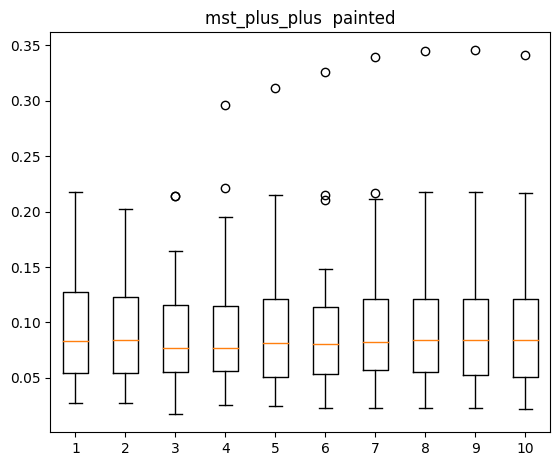

In [173]:
fig = plt.figure(figsize =(5, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(plot_list[:])
plt.title(method + '  ' + test)
plt.show()

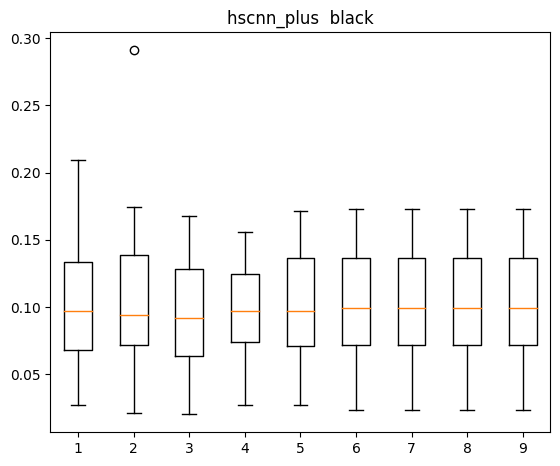

In [137]:
fig = plt.figure(figsize =(5, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(plot_list[1:])
plt.title(method + '  ' + test)
plt.show()

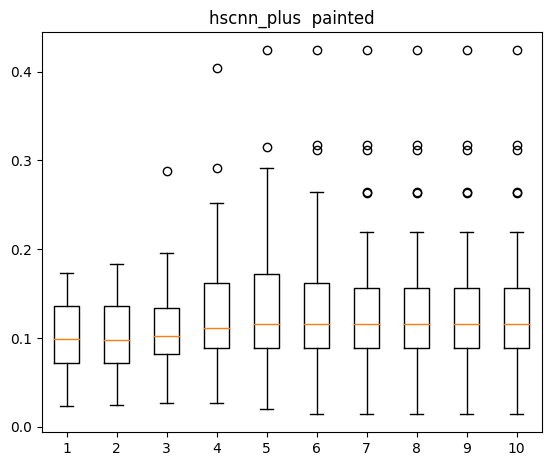

In [124]:
fig = plt.figure(figsize =(5, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(plot_list)
plt.title(method + '  ' + test)
plt.show()

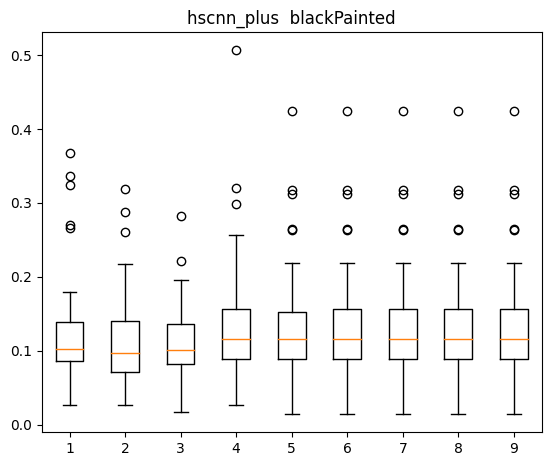

In [141]:
fig = plt.figure(figsize =(5, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(plot_list[1:])
plt.title(method + '  ' + test)
plt.show()

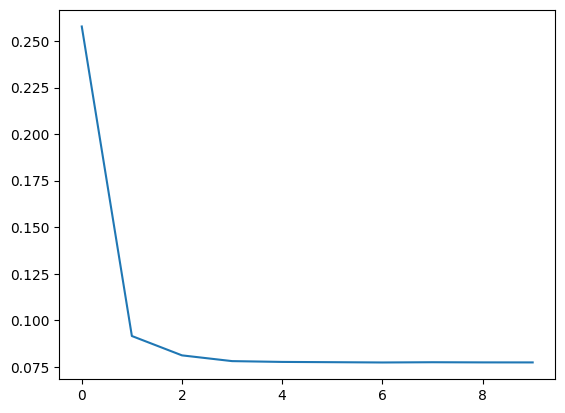

In [27]:
plt.plot(all_sizes)

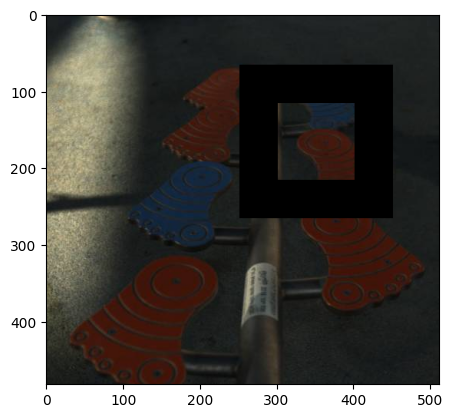

In [66]:
path_write = './dataset_box/'
outer = 100
for i, d in enumerate(range(1, 100, 10)):
    painted  = black_around(image_list[1], 166, 352, d, outer)
    save_image(painted, path_write + 'im' + str(i) + '.jpg')
plt.imshow(black_around(image_list[1], 166, 352, 100))
plt.show()

In [ ]:
path_read = './dataset/test/rgb/'
image_list = []
d = 50
for (root, dirs, file) in os.walk(path_read):
    for f in file:
        print(path_read + f)
        img_path = path_read + f
        file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
        original_image = np.array(Image.open(img_path).convert('RGB'))
        image_list.append(original_image)
print(image_list[0].shape)
plt.imshow(crop_around(image_list[0], 254, 103, d))
plt.show()
plt.imshow(crop_around(image_list[1], 166, 352, d))
plt.show()

In [39]:
path_write = './dataset_box/'
for i, d in enumerate(range(0, 200, 10)):
    hf = h5py.File(path_write + 'im' + str(i) + '.mat', 'w')
    hf.create_dataset('cube', data=hyper_list[1])
    hf.close()

./dataset/test/gt/ARAD_1K_0903.mat
./dataset/test/gt/ARAD_1K_0905.mat


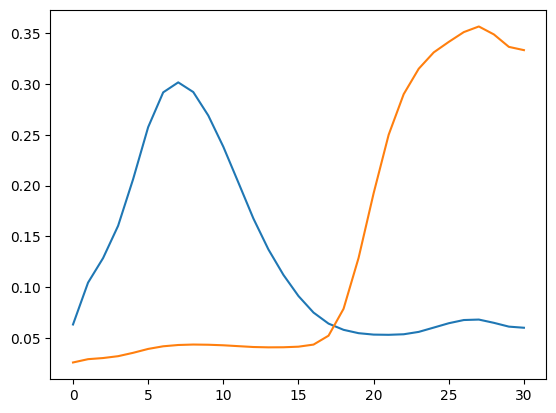

In [41]:
path_read = './dataset/test/gt/'
hyper_list = []
for (root, dirs, file) in os.walk(path_read):
    for f in file:
        print(path_read + f)
        img_path = path_read + f
        file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
        # original_image = Image.open(img_path).convert('RGB')
        with h5py.File(img_path, 'r') as mat:
                hyper = np.float32(np.array(mat['cube']))
        hyper = np.transpose(hyper, [0, 2, 1])
        hyper_list.append(hyper)
# plt.plot(hyper_list[0][:, 78, 480])
# plt.plot(hyper_list[0][:, 254, 103])
# plt.show()
plt.plot(hyper_list[1][:, 211, 190])
plt.plot(hyper_list[1][:, 166, 352])
plt.show()

0.13333333333333333
0.07058823529411765
0.07058823529411765
0.07450980392156863
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353


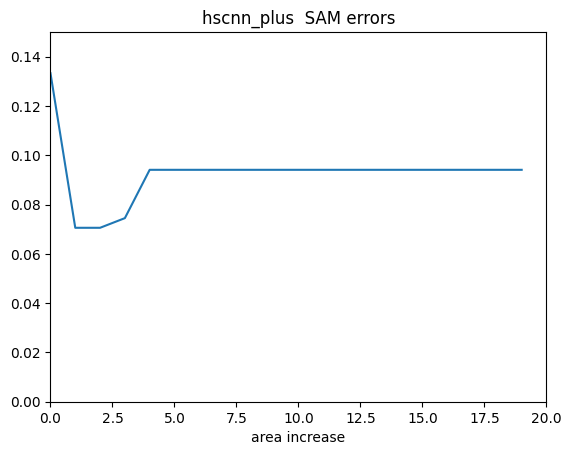

In [9]:
# Painted 0 to 200 step 10
method = 'hscnn_plus'
path_read = './sam_maps/' + method + '/' + method + '_painted/'
errors = []
for f in range(20):
    # print(path_read + str(f))
    img_path = path_read + 'im' + str(f) + '.png'
    file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
    original_image = np.array(Image.open(img_path))
    print(original_image[166, 352]/255)
    errors.append(original_image[166, 352]/255)
plt.plot(errors)
plt.xlim([0, 20])
plt.ylim([0, 0.15])
plt.xlabel('area increase')
plt.title(method + '  ' + 'SAM errors')
plt.show()


0.6431372549019608
0.0784313725490196
0.07058823529411765
0.09019607843137255
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353
0.09411764705882353


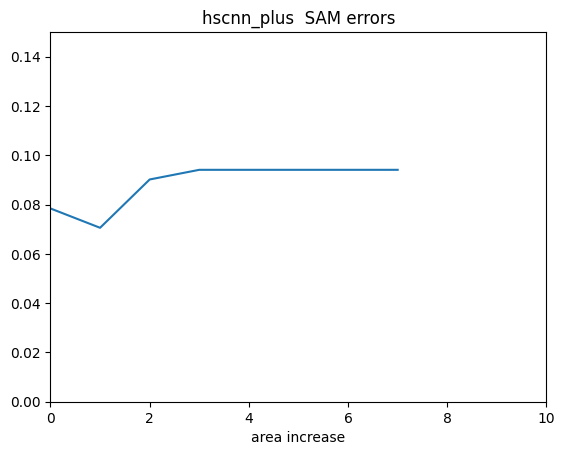

In [7]:
# Black Painted 1 to 100 step 10
method = 'hscnn_plus'
path_read = './sam_maps/' + method + '/' + method + '_blackPainted/'
errors = []
for f in range(9):
    # print(path_read + str(f))
    img_path = path_read + 'im' + str(f) + '.png'
    file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
    original_image = np.array(Image.open(img_path))
    print(original_image[166, 352]/255)
    errors.append(original_image[166, 352]/255)
plt.plot(errors[1:])
plt.xlim([0, 10])
plt.ylim([0, 0.15])
plt.xlabel('area increase')
plt.title(method + '  ' + 'SAM errors')
plt.show()

0.0
0.09019607843137255
0.08235294117647059
0.12941176470588237
0.14901960784313725
0.12156862745098039
0.13725490196078433
0.13333333333333333
0.13333333333333333


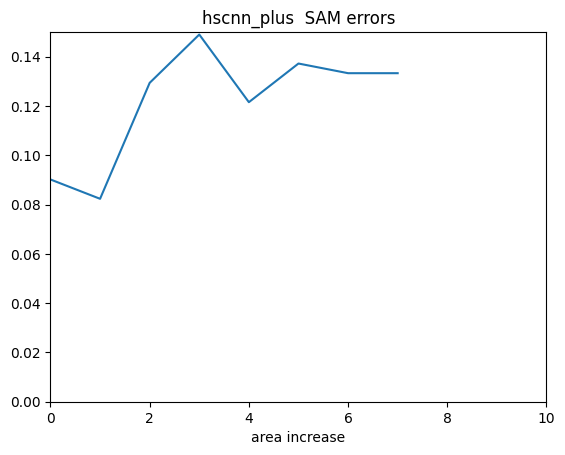

In [5]:
# Black UNpainted 1 to 100 step 10
method = 'hscnn_plus'
path_read = './sam_maps/' + method + '/' + method + '_black/'
errors = []
for f in range(9):
    # print(path_read + str(f))
    img_path = path_read + 'im' + str(f) + '.png'
    file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
    original_image = np.array(Image.open(img_path))
    print(original_image[166, 352]/255)
    errors.append(original_image[166, 352]/255)
plt.plot(errors[1:])
plt.xlim([0, 10])
plt.ylim([0, 0.15])
plt.xlabel('area increase')
plt.title(method + '  ' + 'SAM errors')
plt.show()

./test_develop_code/exp/hscnn_plus/0


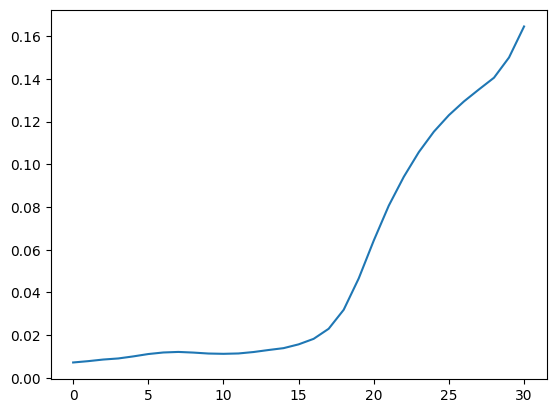

./test_develop_code/exp/hscnn_plus/1


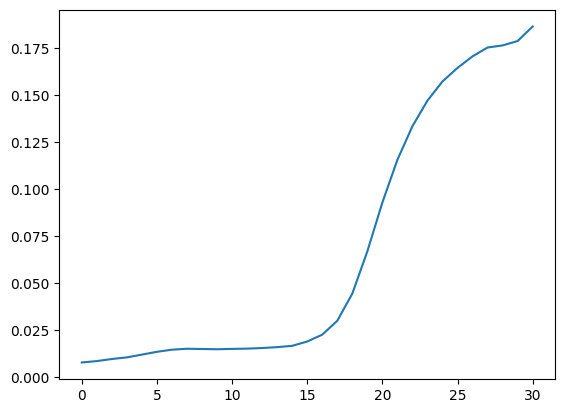

./test_develop_code/exp/hscnn_plus/2


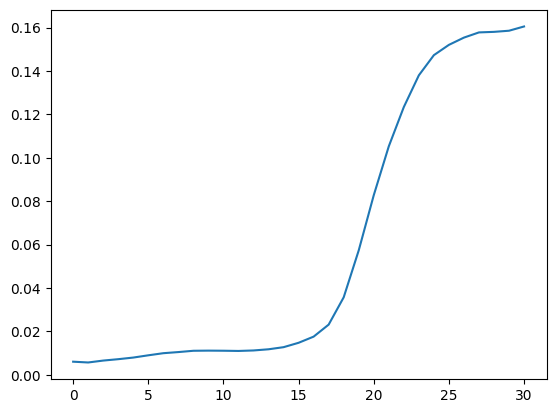

./test_develop_code/exp/hscnn_plus/3


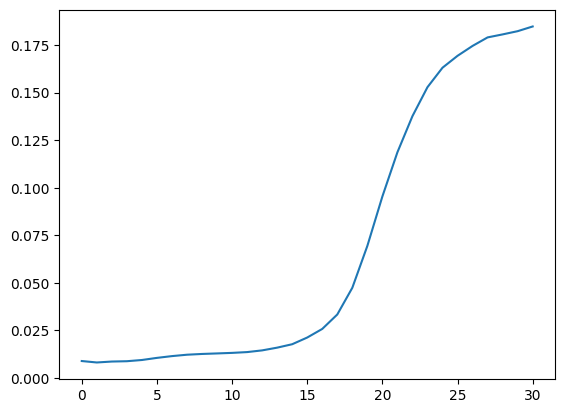

./test_develop_code/exp/hscnn_plus/4


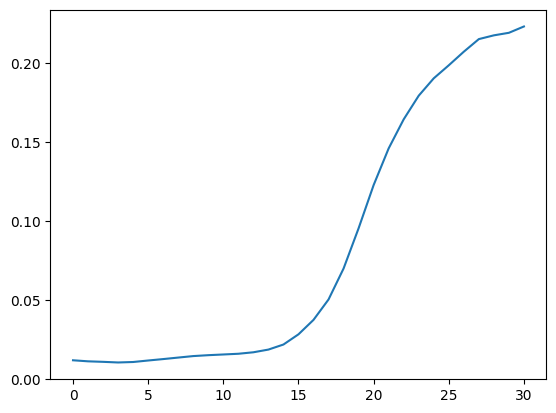

./test_develop_code/exp/hscnn_plus/5


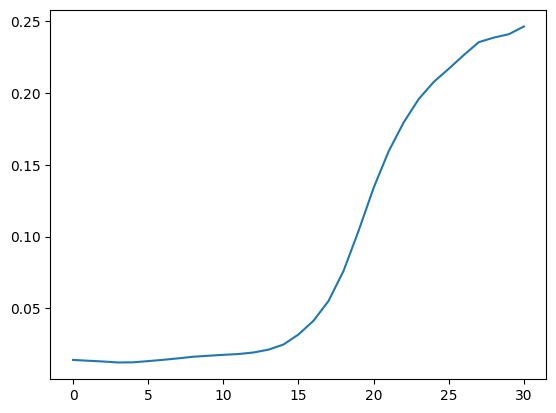

./test_develop_code/exp/hscnn_plus/6


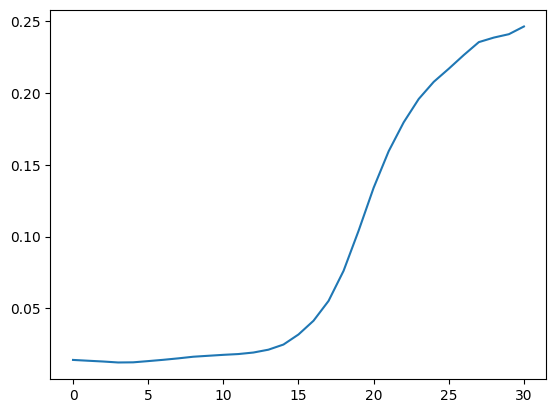

./test_develop_code/exp/hscnn_plus/7


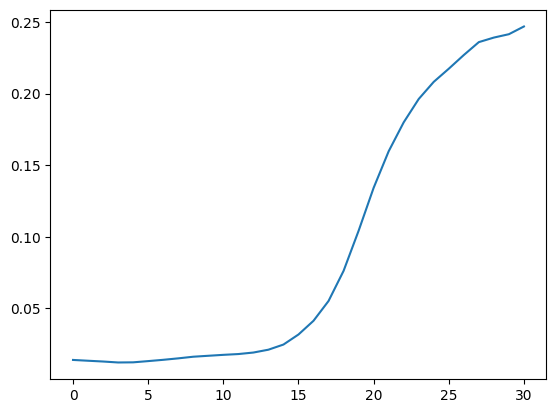

./test_develop_code/exp/hscnn_plus/8


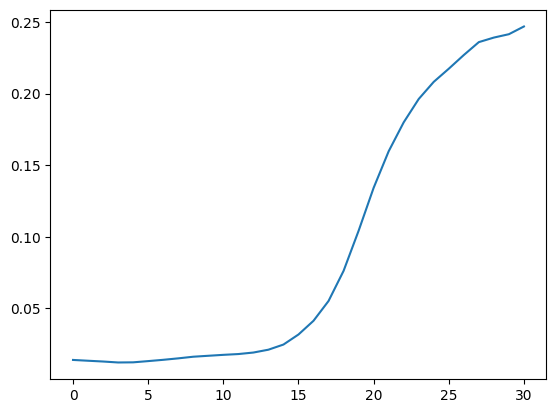

./test_develop_code/exp/hscnn_plus/9


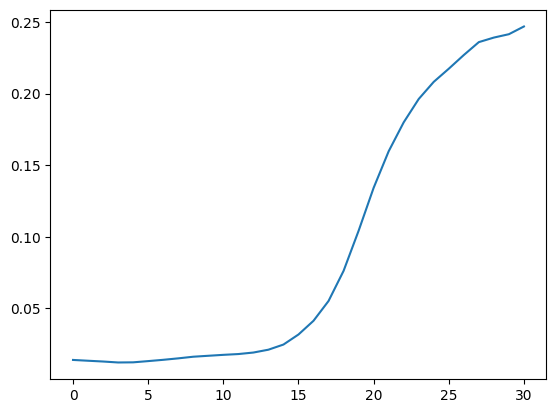

./test_develop_code/exp/hscnn_plus/10


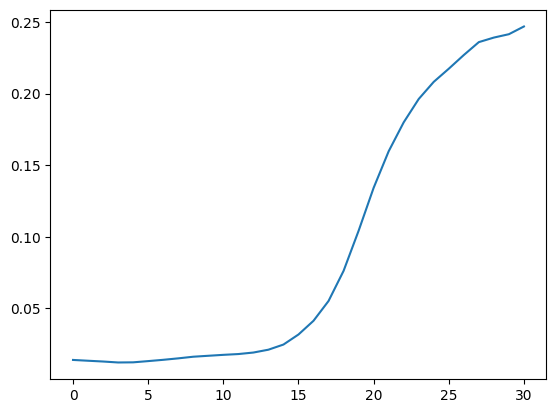

./test_develop_code/exp/hscnn_plus/11


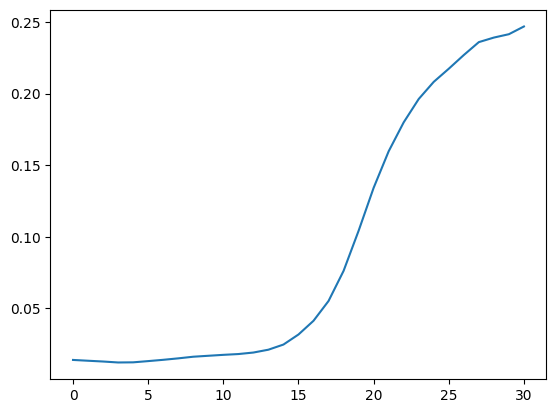

./test_develop_code/exp/hscnn_plus/12


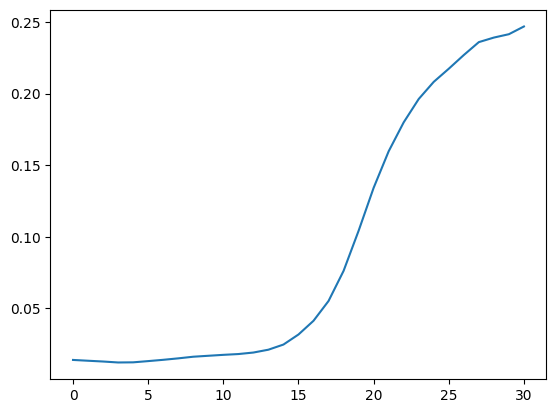

./test_develop_code/exp/hscnn_plus/13


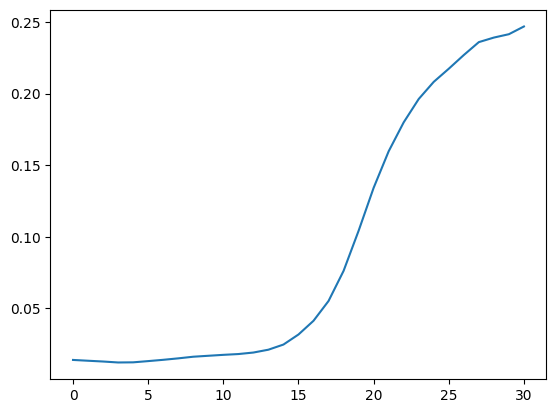

./test_develop_code/exp/hscnn_plus/14


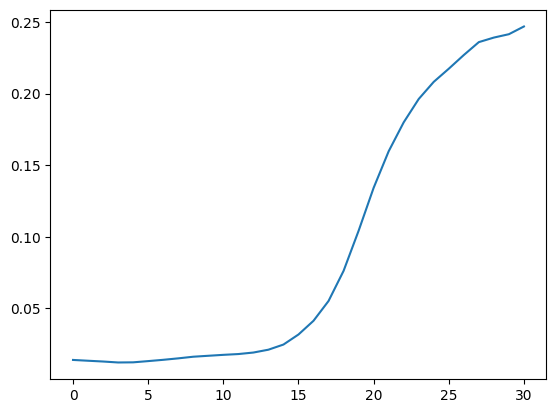

./test_develop_code/exp/hscnn_plus/15


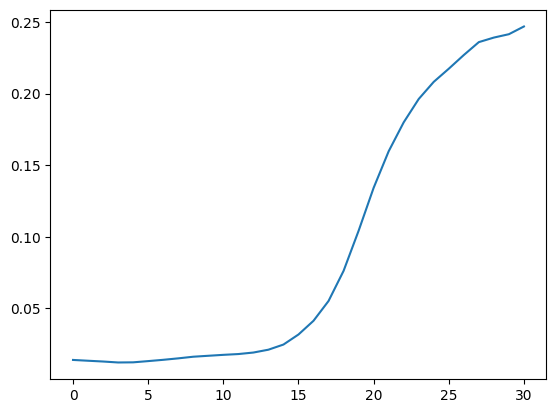

./test_develop_code/exp/hscnn_plus/16


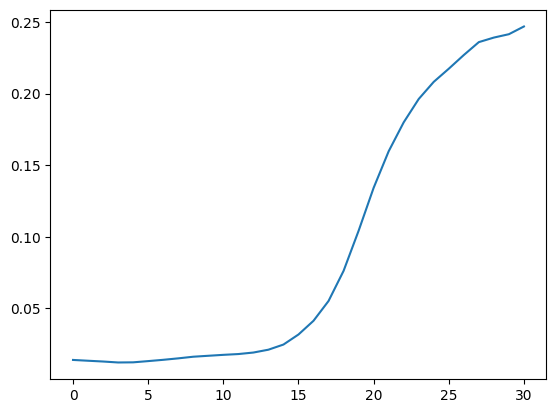

./test_develop_code/exp/hscnn_plus/17


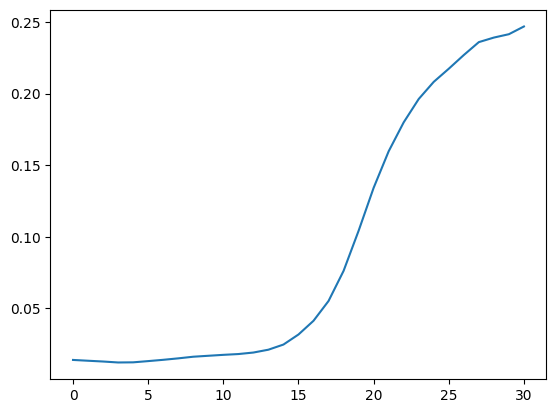

./test_develop_code/exp/hscnn_plus/18


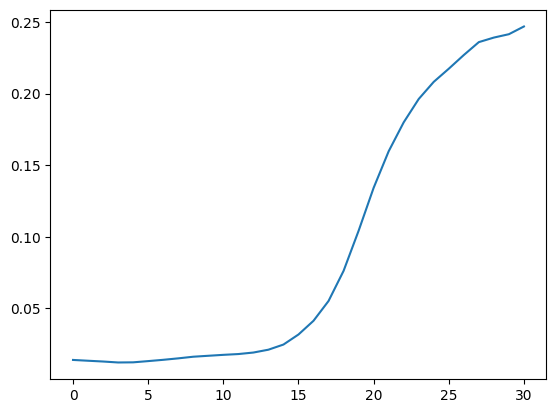

./test_develop_code/exp/hscnn_plus/19


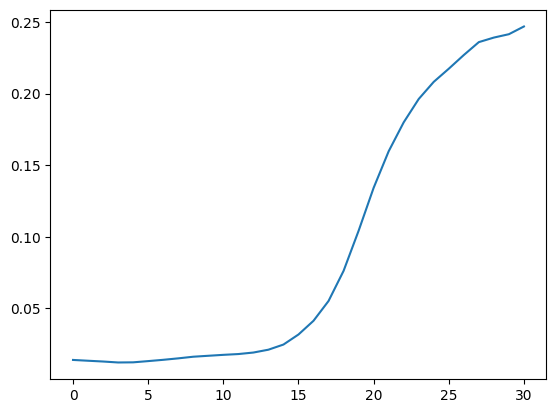

In [47]:
# painted
path_read = './test_develop_code/exp/hscnn_plus/'
hyper_list = []
for f in range(20):
    print(path_read + str(f))
    img_path = path_read + 'im' + str(f) + '.mat'
    file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
    # original_image = Image.open(img_path).convert('RGB')
    with h5py.File(img_path, 'r') as mat:
            hyper = np.float32(np.array(mat['cube']))
    hyper = np.transpose(hyper, [0, 2, 1])
    hyper_list.append(hyper)
    plt.plot(hyper[:, 166, 352])
    plt.show()

./test_develop_code/exp/hscnn_plus/0


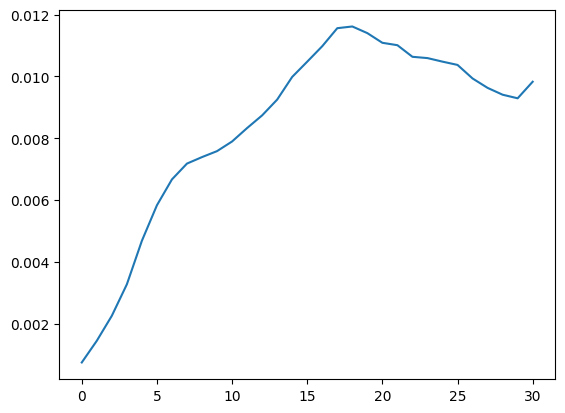

./test_develop_code/exp/hscnn_plus/1


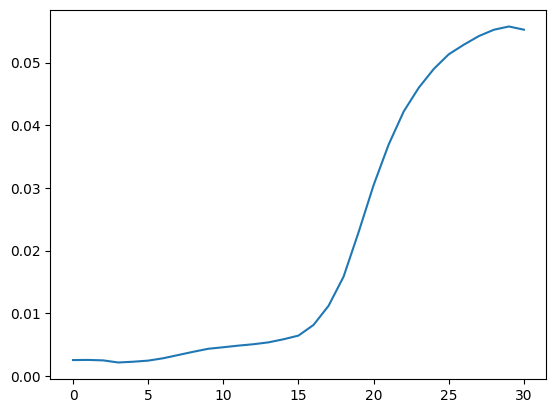

./test_develop_code/exp/hscnn_plus/2


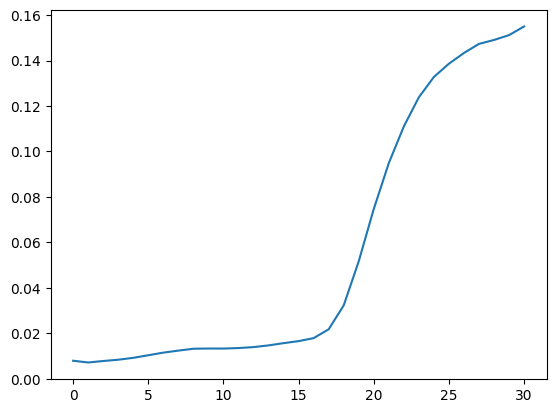

./test_develop_code/exp/hscnn_plus/3


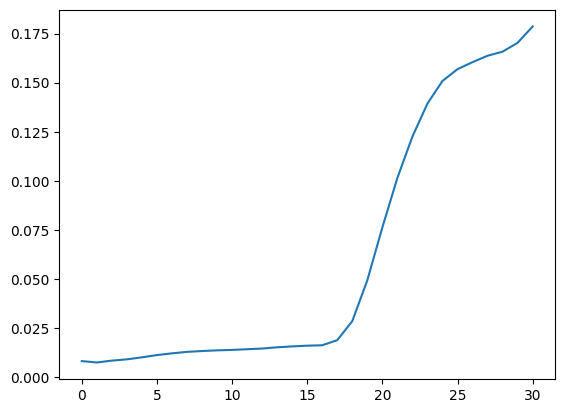

./test_develop_code/exp/hscnn_plus/4


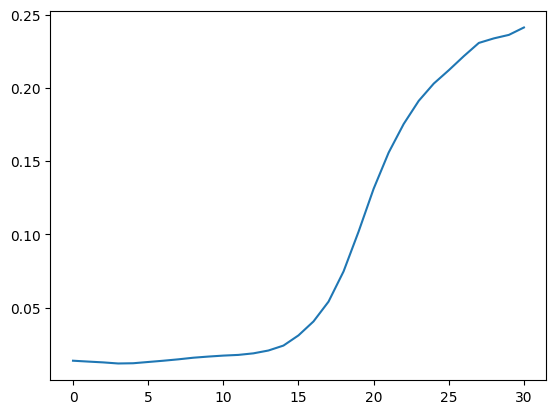

./test_develop_code/exp/hscnn_plus/5


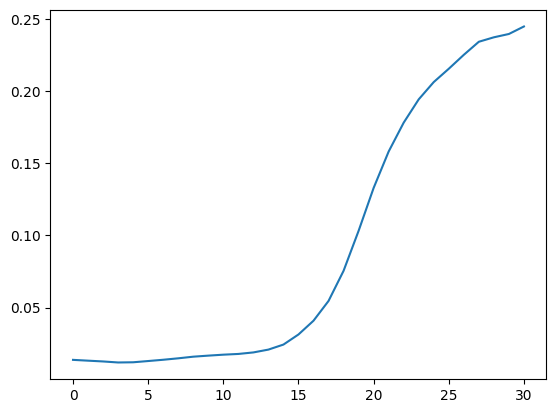

./test_develop_code/exp/hscnn_plus/6


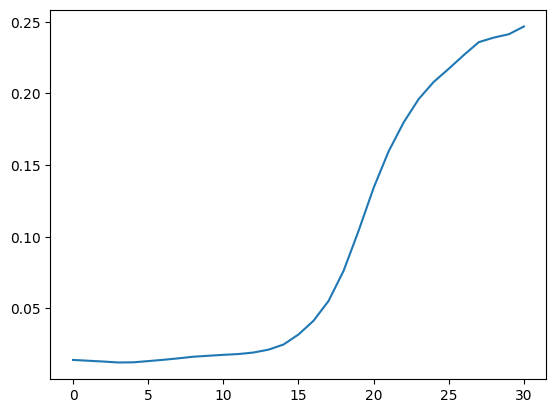

./test_develop_code/exp/hscnn_plus/7


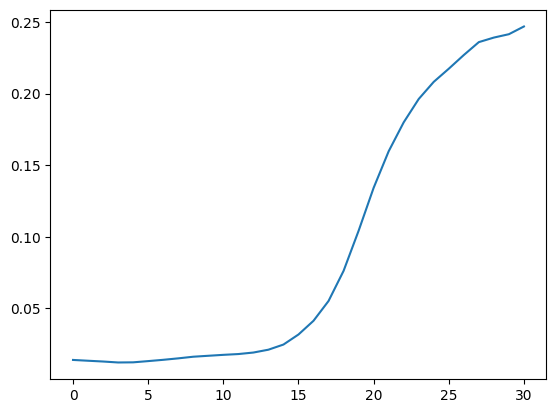

./test_develop_code/exp/hscnn_plus/8


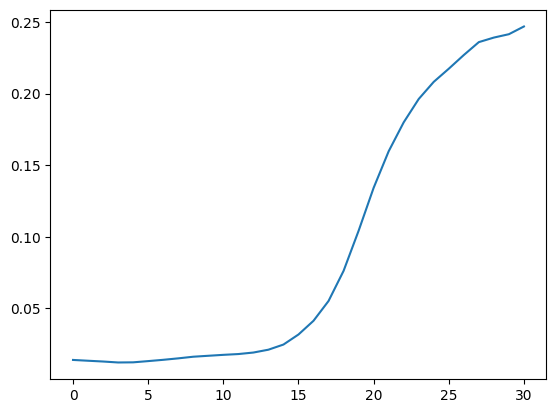

./test_develop_code/exp/hscnn_plus/9


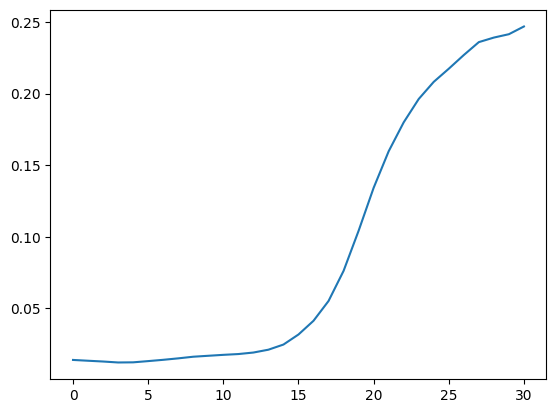

./test_develop_code/exp/hscnn_plus/10


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './test_develop_code/exp/hscnn_plus/im10.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [63]:
# Black painted
path_read = './test_develop_code/exp/hscnn_plus/'
hyper_list = []
for f in range(20):
    print(path_read + str(f))
    img_path = path_read + 'im' + str(f) + '.mat'
    file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
    # original_image = Image.open(img_path).convert('RGB')
    with h5py.File(img_path, 'r') as mat:
            hyper = np.float32(np.array(mat['cube']))
    hyper = np.transpose(hyper, [0, 2, 1])
    hyper_list.append(hyper)
    plt.plot(hyper[:, 166, 352])
    plt.show()

./test_develop_code/exp/hscnn_plus/0


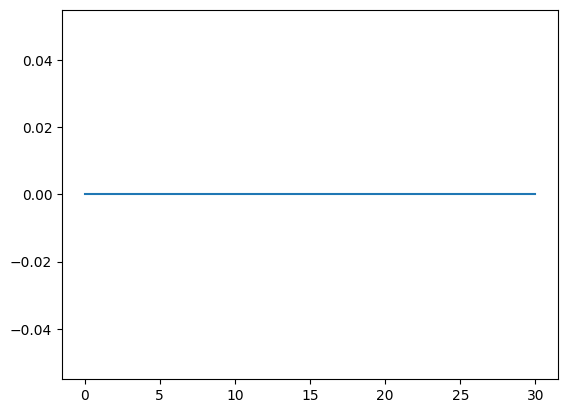

./test_develop_code/exp/hscnn_plus/1


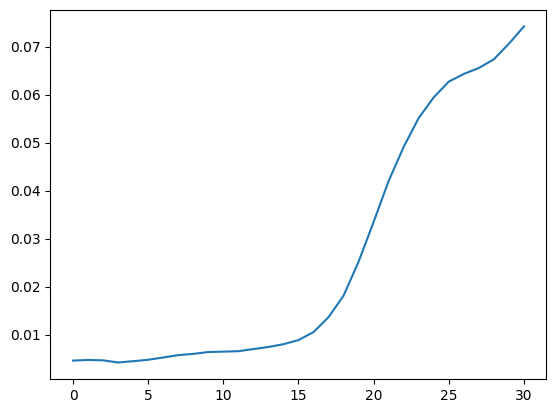

./test_develop_code/exp/hscnn_plus/2


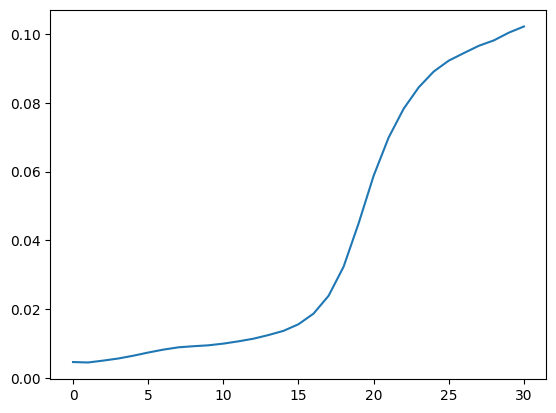

./test_develop_code/exp/hscnn_plus/3


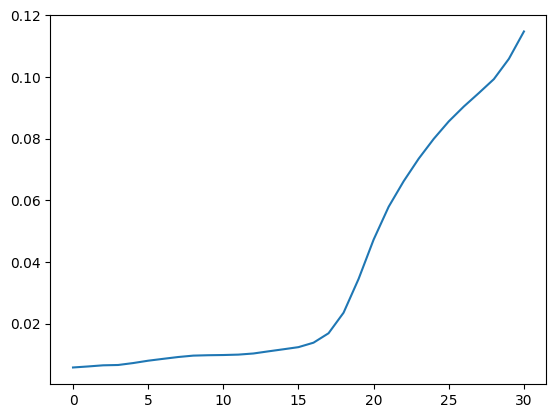

./test_develop_code/exp/hscnn_plus/4


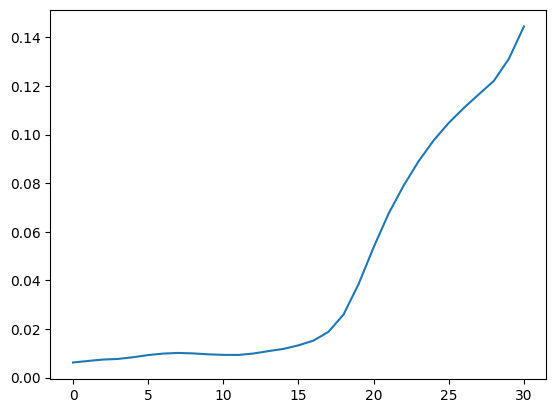

./test_develop_code/exp/hscnn_plus/5


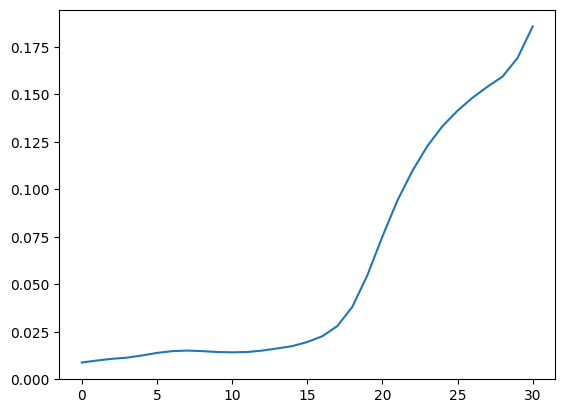

./test_develop_code/exp/hscnn_plus/6


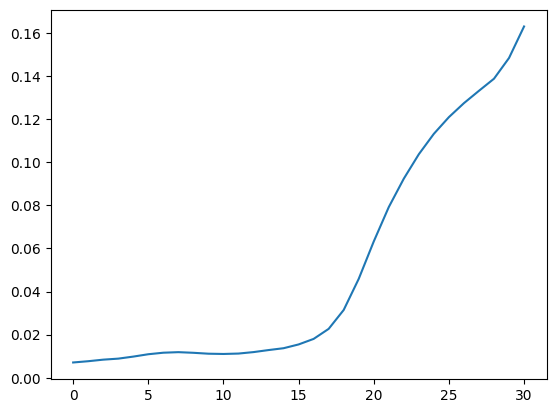

./test_develop_code/exp/hscnn_plus/7


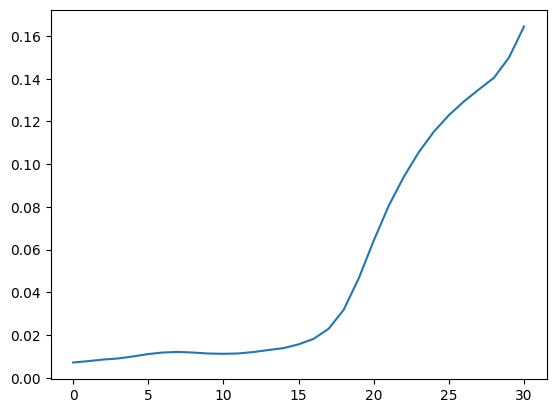

./test_develop_code/exp/hscnn_plus/8


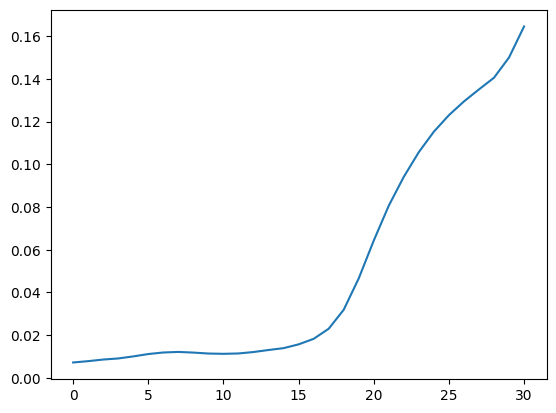

./test_develop_code/exp/hscnn_plus/9


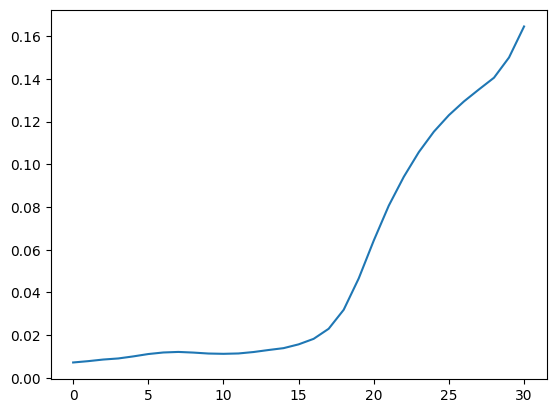

./test_develop_code/exp/hscnn_plus/10


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './test_develop_code/exp/hscnn_plus/im10.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [68]:
# Black UNpainted
path_read = './test_develop_code/exp/hscnn_plus/'
hyper_list = []
for f in range(20):
    print(path_read + str(f))
    img_path = path_read + 'im' + str(f) + '.mat'
    file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
    # original_image = Image.open(img_path).convert('RGB')
    with h5py.File(img_path, 'r') as mat:
            hyper = np.float32(np.array(mat['cube']))
    hyper = np.transpose(hyper, [0, 2, 1])
    hyper_list.append(hyper)
    plt.plot(hyper[:, 166, 352])
    plt.show()

./dataset/test/mst_plus_plus/ARAD_1K_0903.mat
./dataset/test/mst_plus_plus/ARAD_1K_0905.mat


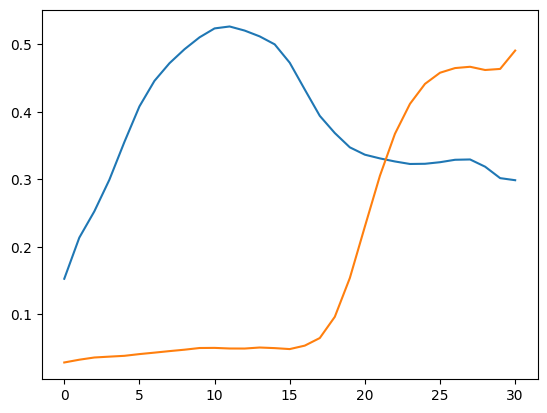

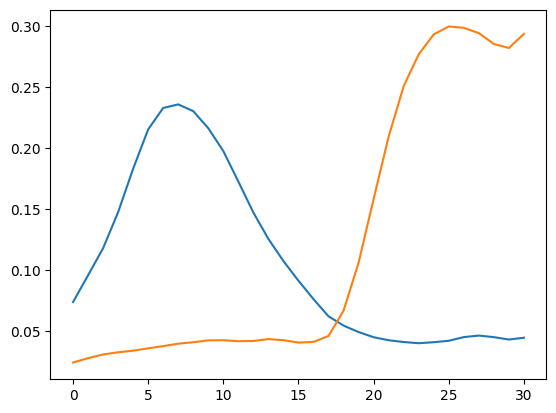

In [16]:
path_read = './dataset/test/mst_plus_plus/'
path_write = './dataset_ref/cropped_rgb/'
hyper_list = []
for (root, dirs, file) in os.walk(path_read):
    for f in file:
        print(path_read + f)
        img_path = path_read + f
        file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
        # original_image = Image.open(img_path).convert('RGB')
        with h5py.File(img_path, 'r') as mat:
                hyper = np.float32(np.array(mat['cube']))
        hyper = np.transpose(hyper, [0, 2, 1])
        hyper_list.append(hyper)
plt.plot(hyper_list[0][:, 78, 480])
plt.plot(hyper_list[0][:, 254, 103])
plt.show()
plt.plot(hyper_list[1][:, 211, 190])
plt.plot(hyper_list[1][:, 166, 352])
plt.show()

./dataset/test/hscnn/ARAD_1K_0903.mat
./dataset/test/hscnn/ARAD_1K_0905.mat


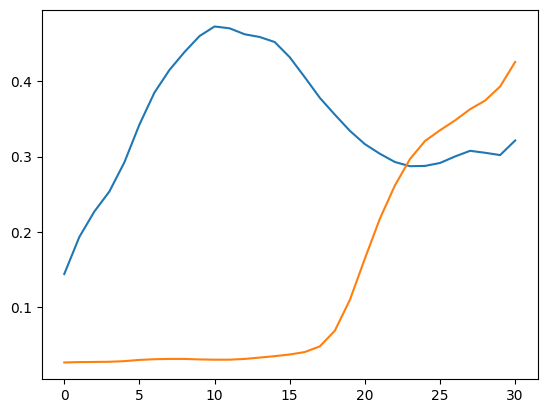

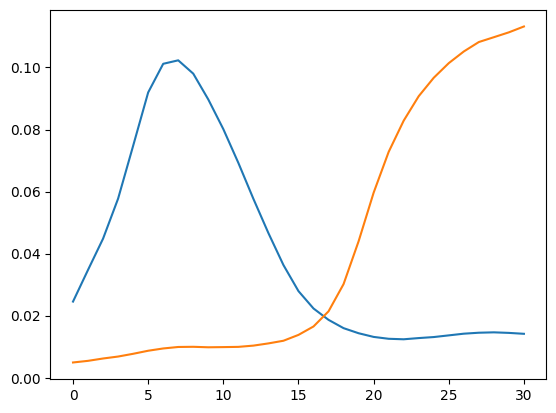

In [17]:
path_read = './dataset/test/hscnn/'
path_write = './dataset_ref/cropped_rgb/'
hyper_list = []
for (root, dirs, file) in os.walk(path_read):
    for f in file:
        print(path_read + f)
        img_path = path_read + f
        file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
        # original_image = Image.open(img_path).convert('RGB')
        with h5py.File(img_path, 'r') as mat:
                hyper = np.float32(np.array(mat['cube']))
        hyper = np.transpose(hyper, [0, 2, 1])
        hyper_list.append(hyper)
plt.plot(hyper_list[0][:, 78, 480])
plt.plot(hyper_list[0][:, 254, 103])
plt.show()
plt.plot(hyper_list[1][:, 211, 190])
plt.plot(hyper_list[1][:, 166, 352])
plt.show()